In [111]:
#mm ... small edits by M. M.
# (#aaa #aaaa #aaaa ... "attention", "importance" marks, just for M. M.)
#mm-todo-tweak #aaaa

#mm
import torch
torch.set_printoptions(profile='short')
##%precision 2
# https://pytorch.org/docs/stable/generated/torch.set_printoptions.html
#torch.set_printoptions(precision=0)
torch.set_printoptions(precision=4)
torch.set_printoptions(threshold=7)
torch.set_printoptions(edgeitems=3)


\#mm
(to the discord server)  
I wanted to see, how the vectors look  ... I have found TensorBoard Projector ...

a screenshot:

![title](crop173.png)

  

In [112]:

## http://localhost:6006/#projector

## OR THERE IS AN ALTERNATIVE WAY TO RUN THE tensorboard PROJECTOR ... 

#!start tensorboard --logdir d:/ai

## or if in unix, then probably: !tensorboard --logdir ...  &

##!taskkill /IM "tensorboard*" /f


### MAYBE A BETTER WAY TO run TENSORBOARD  ... in-the-notebook#
##%load_ext tensorboard
##%tensorboard  --logdir d:/ai
### Reusing TensorBoard on port 6006 (pid 11640), started 0:21:58 ago. (Use '!kill 11640' to kill it.)


# writer

## defau

In [113]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("d:/ai/makemore1disc/runs")

In [114]:
n27=27

In [115]:
words = open('names.txt', 'r').read().splitlines()

In [116]:
#mm-todo-tweak #aaaa
words[:15]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella']

## smallest

In [117]:
###from torch.utils.tensorboard import SummaryWriter
###writer = SummaryWriter("d:/ai/abc4chr-makemore1/runs")
#aaa DIRNAME SHALL NOT START WITH A DIGIT : 4ch  abc4ch

writer=None
#aaa 4 points too small ... tb hangs


In [118]:
import re
allwords = open('names.txt', 'r').read().splitlines()


In [119]:
#mm-todo-tweak #aaaa
n27=4 #5

In [120]:
#mm-todo-tweak #aaaa
words=[x for x in allwords if re.match(r'^[abde]*$',x) ]
words=[x for x in allwords if re.match(r'^[emma]*$',x) ]
print(words)
words=words[:1] #[:2]
print(words)


['emma', 'mae', 'ema', 'emme', 'mea', 'ama', 'maame', 'amma', 'mame', 'amea', 'ma', 'amee', 'emma']
['emma']


# words, n27, 

In [121]:
#mm

In [122]:
#sorted(words) 

In [123]:
#words.sort() 

In [124]:
len(words)

1

In [125]:
min(len(w) for w in words)

4

In [126]:
max(len(w) for w in words)

4

In [127]:
b = {}

#for w in words[:3]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    
    #aaa
    b[bigram] = b.get(bigram, 0) + 1
    
    #mm collections.counter ?
    

In [128]:
sorted(b.items(), key = lambda kv: -kv[1]) [:15]

[(('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('a', '<E>'), 1)]

In [129]:
import torch

In [130]:
N = torch.zeros((n27, n27), dtype=torch.int32)

In [131]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [132]:
chars, stoi, itos

(['a', 'e', 'm'],
 {'a': 1, 'e': 2, 'm': 3, '.': 0},
 {1: 'a', 2: 'e', 3: 'm', 0: '.'})

In [133]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

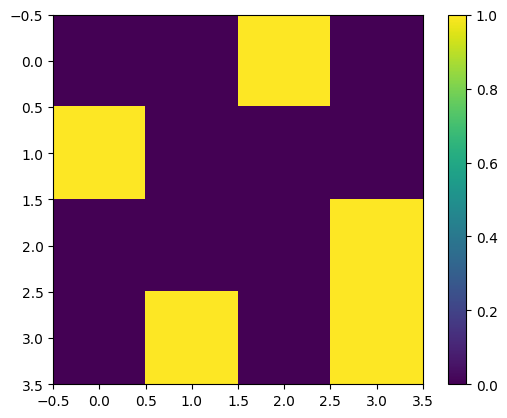

In [134]:
#aaaa
import matplotlib.pyplot as plt
%matplotlib inline
plt.colorbar(plt.imshow(N))


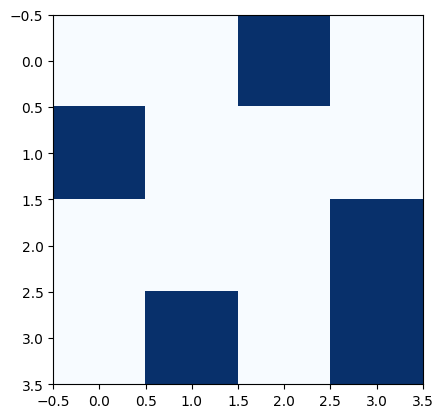

In [135]:
plt.imshow(N, cmap='Blues')

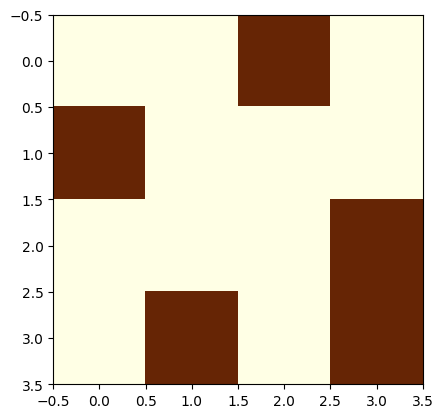

In [136]:
#aaa
plt.imshow(N, cmap=
           #'autumn_r'
          'YlOrBr'
          )

ValueError: 'Autumn' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

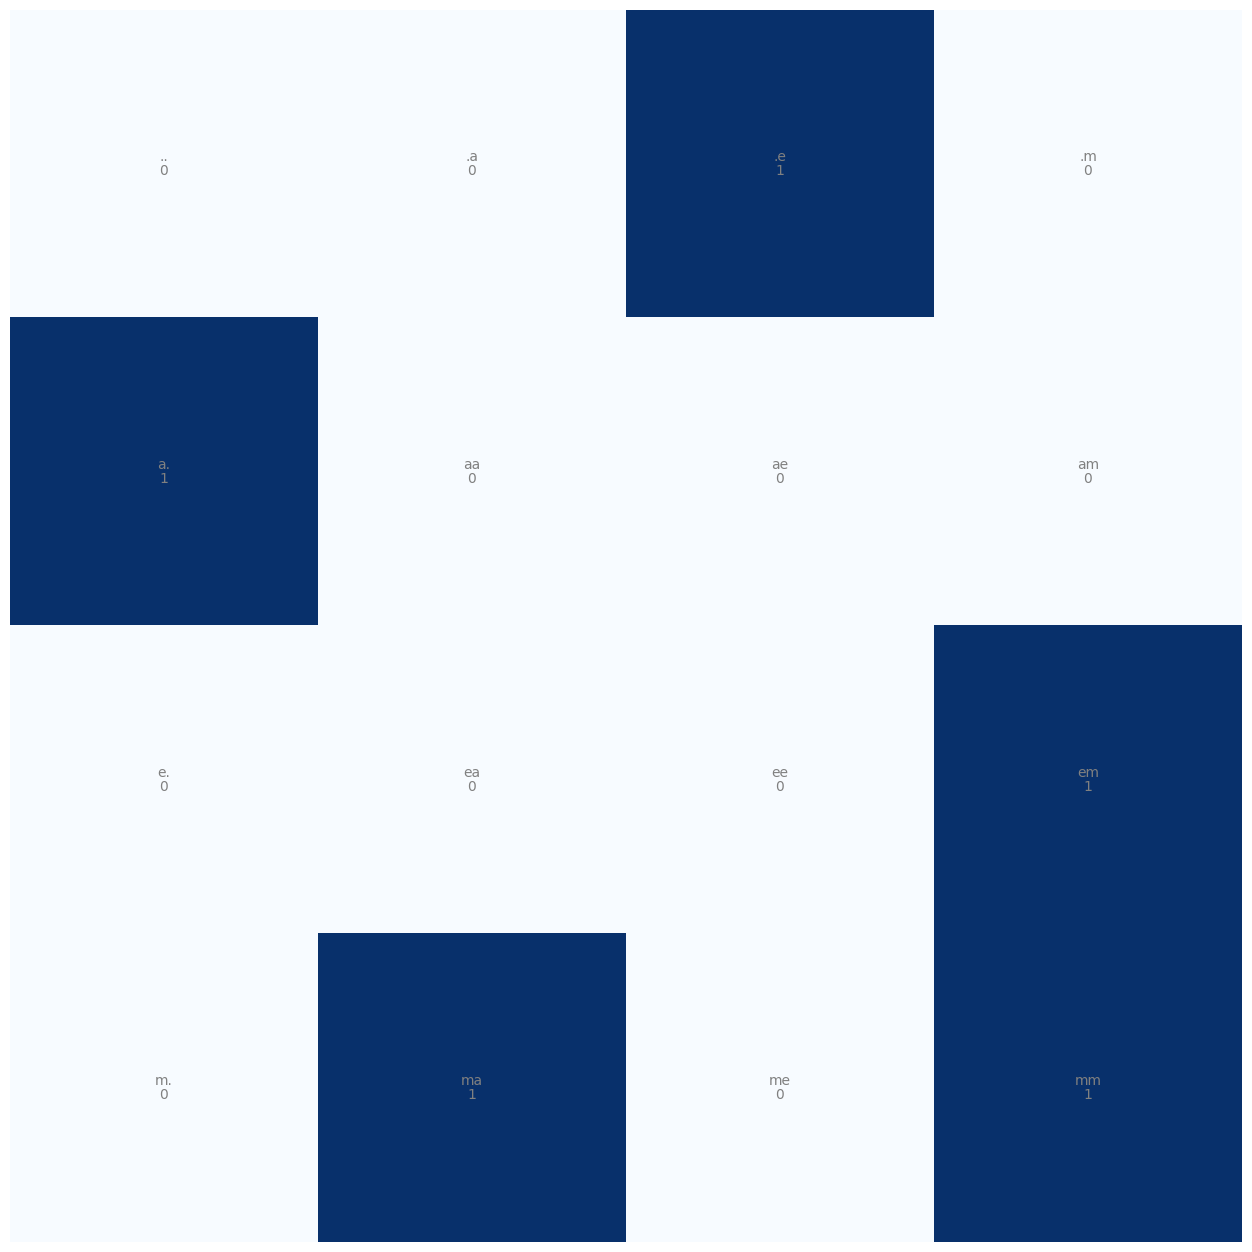

In [137]:
#aaa
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(n27):
    for j in range(n27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [138]:
N[0]

tensor([0, 0, 1, 0], dtype=torch.int32)

In [139]:
N[:,0]

tensor([0, 1, 0, 0], dtype=torch.int32)

In [140]:
N[:,0].shape

torch.Size([4])

In [141]:
p = N[0].float()
p = p / p.sum()
p

tensor([0., 0., 1., 0.])

In [142]:
#mm
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(p, num_samples=12, replacement=True, generator=g)

tensor([2, 2, 2,  ..., 2, 2, 2])

In [143]:
#aaaa
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'e'

In [144]:
###x##P=p #mm
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [145]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2,  ..., 1, 1, 1])

In [146]:
p.shape

torch.Size([3])

In [147]:
#mm move cell

In [148]:
P = (N+0.00001).float()
P /= P.sum(1, keepdims=True)

In [149]:
#mm
#aaaa
# add embedding projector data to summary
if writer:
    print(writer)
    writer.add_embedding(P.transpose(1,0)   , metadata= ['.']+chars)
                     #,     global_step=1)
    writer.flush()
    #writer.close()

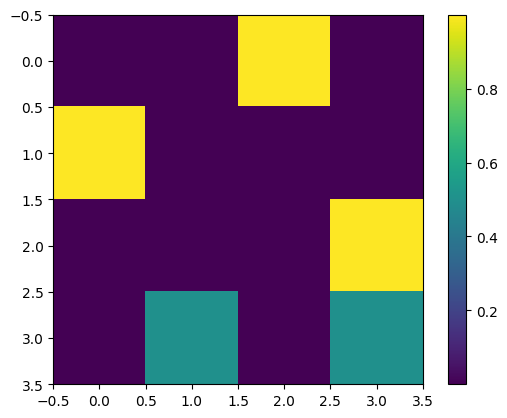

In [150]:
plt.colorbar(plt.imshow(P))


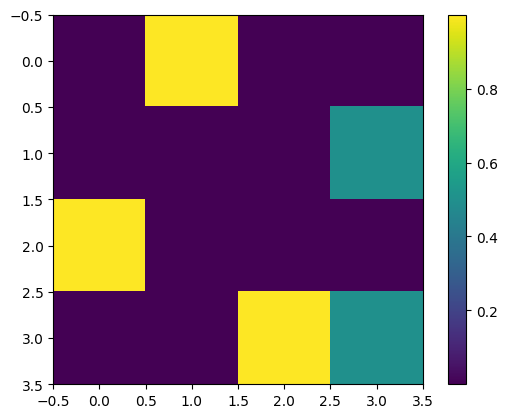

In [151]:
plt.colorbar(plt.imshow(  P.transpose(1,0)    ))


In [152]:
P.shape

torch.Size([4, 4])

In [153]:
P.sum(1, keepdim=True).shape

torch.Size([4, 1])

In [154]:
# 27, 27
# 27,  1

In [155]:
P.sum(1).shape

torch.Size([4])

In [156]:
P.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000])

In [157]:
# 27, 27
#  1, 27

In [158]:
g = torch.Generator().manual_seed(2147483647)

for i in range(15):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    
    #aaa
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

emma.
ema.
ema.
emmmma.
emma.
ema.
ema.
emmma.
emmma.
ema.
ema.
ema.
ema.
emmmma.
emma.


In [44]:
#mm  00:50:14 loss function (the negative log likelihood of the data under our model)

In [45]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [46]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [47]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [48]:
xs

tensor([ 0,  5, 13, 13,  1])

In [49]:
ys

tensor([ 5, 13, 13,  1,  0])

In [50]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=n27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [51]:
xenc.shape

torch.Size([5, 27])

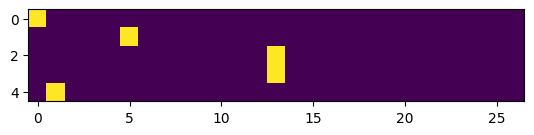

In [52]:
plt.imshow(xenc)

In [53]:
xenc.dtype

torch.float32

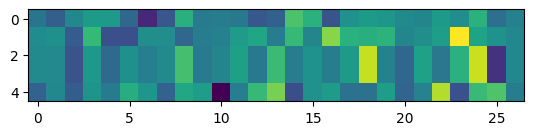

In [54]:

#?orig outputs?
W = torch.randn((n27, n27))
#W = torch.randn((n27, 1))
plt.imshow(  xenc @ W )

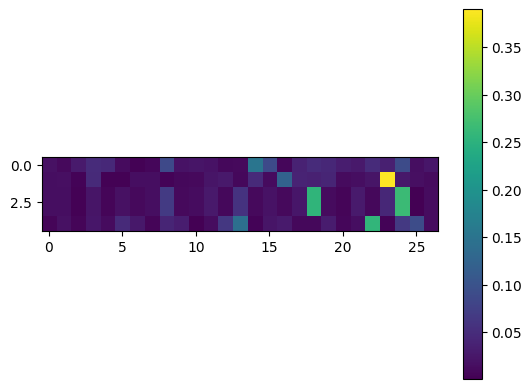

In [55]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)


plt.colorbar(plt.imshow(  probs   ))


In [56]:
probs[0]

tensor([0.0180, 0.0105, 0.0297, 0.0489, 0.0464, 0.0125, 0.0031, 0.0084, 0.0861,
        0.0206, 0.0227, 0.0201, 0.0087, 0.0110, 0.1516, 0.0883, 0.0079, 0.0380,
        0.0485, 0.0445, 0.0317, 0.0280, 0.0494, 0.0346, 0.0903, 0.0157, 0.0250])

In [57]:
probs[0].shape

torch.Size([27])

In [58]:
probs[0].sum()

tensor(1.)

In [59]:
# (5, 27) @ (27, 27) -> (5, 27)

In [60]:
# SUMMARY ------------------------------>>>>

In [61]:
xs

tensor([ 0,  5, 13, 13,  1])

In [62]:
ys

tensor([ 5, 13, 13,  1,  0])

In [63]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((n27, n27), generator=g)

In [64]:
xenc = F.one_hot(xs, num_classes=n27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [65]:
probs.shape

torch.Size([5, 27])

In [66]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())   #aaa loss


#mm
##torch.log10 .log2 .log1p ...







--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [67]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [68]:
xs

tensor([ 0,  5, 13, 13,  1])

In [69]:
ys

tensor([ 5, 13, 13,  1,  0])

In [70]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((n27, n27), generator=g, requires_grad=True)

In [71]:
# forward pass
xenc = F.one_hot(xs, num_classes=n27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [72]:
print(loss.item())

3.7693049907684326


In [73]:
# backward pass
W.grad = None # set to  zero the gradient
#aaa    None  , not 0
loss.backward()

In [74]:
#mm

In [75]:
W.data += -0.1 * W.grad

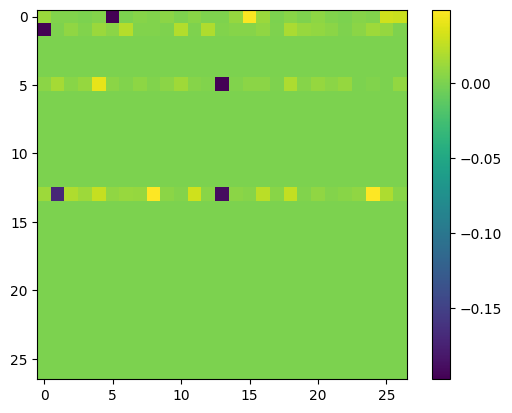

In [76]:
# https://github.com/Antimatter543/karpathy-NN-lectures/blob/main/2%20-%20makemore/makemore.ipynb
plt.colorbar(plt.imshow(W.grad)) # Purples are -ve -> so increasing them reduces loss, ... Wow
# https://discord.com/channels/1020383067459821711/1029849849765564528/1062617855188803614
#  — 01/11/2023 7:23 AM

In [77]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [78]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((n27, n27), generator=g, requires_grad=True)

number of examples:  228146


In [79]:
len(xs)

228146

In [80]:
xs.nelement()

228146

In [81]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=n27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()

#aaaa W**2 regula

  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data +=(
#mm-todo-tweak #aaaa
  -85 #-10 #-1 #-0.1#-50  
     * W.grad
  ) 

3.7686190605163574
3.1929290294647217
2.9719126224517822
2.8508026599884033
2.7770512104034424
2.726975202560425
2.6896660327911377
2.6620962619781494
2.6393747329711914
2.6236658096313477
2.607900381088257
2.5992069244384766
2.5860965251922607
2.581000328063965
2.5696613788604736
2.566671848297119
2.5570733547210693
2.5556085109710693
2.5472843647003174
2.546919584274292
2.5395095348358154
2.539958953857422
2.533230781555176
2.5342979431152344
2.5280888080596924
2.5296316146850586
2.5238237380981445
2.525737762451172
2.5202441215515137
2.522451400756836
2.5172061920166016
2.5196475982666016
2.514601707458496
2.517232656478882
2.5123486518859863
2.515134811401367
2.5103836059570312
2.5132977962493896
2.5086567401885986
2.5116779804229736
2.507129192352295
2.5102407932281494
2.505770444869995
2.5089588165283203
2.5045549869537354
2.5078094005584717
2.5034639835357666
2.5067756175994873
2.5024795532226562
2.5058414936065674
2.501588821411133
2.5049941539764404
2.5007803440093994
2.504224

In [90]:
W.square().mean()

tensor(1.72, grad_fn=<MeanBackward0>)

In [82]:
0.01*(W**2).mean()


tensor(0.0172, grad_fn=<MulBackward0>)

In [91]:
from mmilanutil import *
mmptmaxabs(W)


4.008679389953613

https://github.com/Antimatter543/karpathy-NN-lectures/blob/main/2%20-%20makemore/makemore.ipynb

### Notes:
#### Note 1:

You can smooth the neural network model too like we did the bigram :P. Basically, you know how smoothing the bigram makes it more uniform (by definition lmao), as the differences stop mattering if you add like +10000000 to every element? Uniform distribution... That means, we'd want everything to be equal chances for our NN.

#### Note 2
If all entries of W are 0 (or all equal to each other), then all logit entries become 0, so exp becomes 1, so all probabilities become the same! Therefore, incentivising Weights to be near 0 <=> adding count to the bigram <=> smoothing the prob distribution.

This leads us to **regularisation loss** :o -- smooths out the NN by implementing an incentive on our loss function to minimise the weights!!! (See: 0.01 * (W**2).mean()). This bit makes the weights also a component of loss, so you are somewhat incentivised (increased by the constant) to also make weights get closer to 0 (but we also want to match up with our probabilites section of the loss function, so it's a sort of balancing act). Extra: We could use .sum() aswell, but mean() gives a nicer number that's closer to our normal loss (like gives +2 or smthn) 

In [83]:
torch.linalg.

{'experimental_warning': 'This function is "experimental" and it may change in a future PyTorch release.',
 'sync_note': 'When inputs are on a CUDA device, this function synchronizes that device with the CPU.',
 'sync_note_ex': 'When the inputs are on a CUDA device, this function synchronizes only when :attr:`check_errors`\\ `= True`.',
 'sync_note_has_ex': 'When inputs are on a CUDA device, this function synchronizes that device with the CPU. For a version of this function that does not synchronize, see :func:`{}`.'}

In [86]:
torch.nn.Module?

Init signature: torch.nn.Module() -> None
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation 

In [87]:
writer.add_graph?

Signature:
writer.add_graph(
    model,
    input_to_model=None,
    verbose=False,
    use_strict_trace=True,
)
Docstring:
Add graph data to summary.

Args:
    model (torch.nn.Module): Model to draw.
    input_to_model (torch.Tensor or list of torch.Tensor): A variable or a tuple of
        variables to be fed.
    verbose (bool): Whether to print graph structure in console.
    use_strict_trace (bool): Whether to pass keyword argument `strict` to
        `torch.jit.trace`. Pass False when you want the tracer to
        record your mutable container types (list, dict)
File:      d:\conda\envs\pip310\lib\site-packages\torch\utils\tensorboard\writer.py
Type:      method

In [82]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(50):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=n27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
ays.
minaymoryles.
kondmalodaf.
memumizarie.
odaren.
iaidash.
h.
jionatien.
egwulo.
h.
br.
ahanyn.
ilemannariainien.
be.
f.
amiinela.
trttanameroruceyahrdrimaen.
ksyonutonahangin.
torrederakosakenntyllpasskh.
aay.
h.
kole.
hakilinelfff.
kianv.
eryly.
zeeieil.
kayxtrglynenn.
r.
t.
rkaannnaniyloliojanidanat.
dikie.
s.
elarieiavelvamin.
jon.
eythann.
jarmanaish.
bn.
bdoron.
ch.
ahally.
madjalvdozar.
sian.
itanumaah.
le.
lisarr.
bizyngor.
eve.
blalori.
tovih.
